<a href="https://colab.research.google.com/github/HJNVR/recyclables-are-all-we-need/blob/main/%E2%80%9Cpascal_voc_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

## Read with GluonCV

Loading images and labels is straight-forward with
:py:class:`gluoncv.data.VOCDetection`.



In [2]:
!pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 1.4 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [3]:
#pip install torch==1.6.0 torchvision==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

In [4]:
#pip install --user --upgrade gluoncv

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#pip install numpy==1.9


In [7]:
!pip install gluoncv --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 14.5 MB/s 


In [8]:
import time
from matplotlib import pyplot as plt
import numpy as np
import mxnet as mx
from mxnet import autograd, gluon
import gluoncv as gcv
from gluoncv.utils import download, viz

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.12.1+cu113` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [9]:
!cp /content/drive/MyDrive/VOCdevkit.zip '/content'

In [10]:
!unzip '/content/VOCdevkit.zip'

Archive:  /content/VOCdevkit.zip
   creating: VOCdevkit/
  inflating: VOCdevkit/.DS_Store     
  inflating: __MACOSX/VOCdevkit/._.DS_Store  
   creating: VOCdevkit/VOC2022/
   creating: VOCdevkit/VOC2022/ImageSets/
  inflating: VOCdevkit/VOC2022/get_train_test_text.py  
  inflating: __MACOSX/VOCdevkit/VOC2022/._get_train_test_text.py  
  inflating: VOCdevkit/VOC2022/.DS_Store  
  inflating: __MACOSX/VOCdevkit/VOC2022/._.DS_Store  
   creating: VOCdevkit/VOC2022/Annotations/
  inflating: __MACOSX/VOCdevkit/VOC2022/._Annotations  
   creating: VOCdevkit/VOC2022/JPEGImages/
  inflating: __MACOSX/VOCdevkit/VOC2022/._JPEGImages  
  inflating: VOCdevkit/VOC2022/ImageSets/.DS_Store  
  inflating: __MACOSX/VOCdevkit/VOC2022/ImageSets/._.DS_Store  
   creating: VOCdevkit/VOC2022/ImageSets/Main/
  inflating: VOCdevkit/VOC2022/Annotations/plastic_bottlemanually-download-plastic-bottle22.xml  
  inflating: __MACOSX/VOCdevkit/VOC2022/Annotations/._plastic_bottlemanually-download-plastic-bottle22.xm

In [11]:
from gluoncv.data import VOCDetection
class VOCLike(VOCDetection):
    CLASSES = ['can', 'cup', 'plastic_bottle', 'styrofoam']
    def __init__(self, root, splits, transform=None, index_map=None, preload_label=True):
        super(VOCLike, self).__init__(root, splits, transform, index_map, preload_label)
train = VOCLike(root='/content/VOCdevkit', splits=((2022, 'train'),))
test = VOCLike(root='/content/VOCdevkit', splits=((2022, 'test'),))
print('length of train', len(train))
print('label example', train[0][1])
print('length of test', len(test))
print('label example', test[0][1])
#dataset = VOCLike(root='/content/VOCdevkit', splits=((2022, 'train'),))
#dataset = VOCLike(root='/content/drive/MyDrive/annotation_xml', splits=(2017, 'train'))
#print('length of dataset:', len(dataset))
#print('label example:')
#print(dataset[0][1])

length of train 236
label example [[ 95. 361. 237. 512.   0.   0.]]
length of test 59
label example [[292.  61. 523. 353.   3.   0.]
 [ 78. 179. 300. 356.   3.   0.]]


Now let's visualize one example.



label: [[ 11.   7. 356. 229.   3.   0.]]


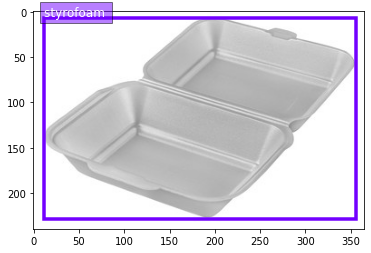

In [12]:
classes = ['can', 'cup', 'plastic_bottle', 'styrofoam'] # only one foreground class here
#image, label = dataset[699]
image, label = train[20]
print('label:', label)
# display image and label
ax = viz.plot_bbox(image, bboxes=label[:, :4], labels=label[:, 4:5], class_names=classes)
plt.show()

label: [[ 428.  485. 1224. 1183.    3.    0.]
 [  54.  145.  546.  869.    3.    0.]]


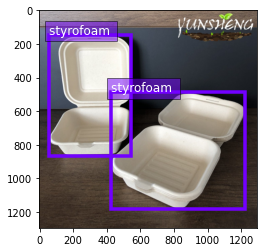

In [13]:
classes = ['can', 'cup', 'plastic_bottle', 'styrofoam'] # only one foreground class here
#image, label = dataset[699]
image, label = test[20]
print('label:', label)
# display image and label
ax = viz.plot_bbox(image, bboxes=label[:, :4], labels=label[:, 4:5], class_names=classes)
plt.show()

In [14]:
#net = gcv.model_zoo.get_model('ssd_512_mobilenet1.0_voc', pretrained=True)

Take bounding boxes by slice columns from 0 to 4



In [15]:
#net.reset_class(classes)

take class ids by slice the 5th column



In [16]:
net = gcv.model_zoo.get_model('ssd_512_mobilenet1.0_custom', classes=classes,
    pretrained_base=False, transfer='voc')

/usr/local/lib/python3.7/dist-packages/mxnet/gluon/block.py:1784: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


50217KB [00:02, 23694.20KB/s]                           


Visualize image, bounding boxes



In [17]:
def get_dataloader(net, train_dataset, data_shape, batch_size, num_workers):
    from gluoncv.data.batchify import Tuple, Stack, Pad
    from gluoncv.data.transforms.presets.ssd import SSDDefaultTrainTransform
    width, height = data_shape, data_shape
    # use fake data to generate fixed anchors for target generation
    with autograd.train_mode():
        _, _, anchors = net(mx.nd.zeros((1, 3, height, width)))
    batchify_fn = Tuple(Stack(), Stack(), Stack())  # stack image, cls_targets, box_targets
    train_loader = gluon.data.DataLoader(
        train_dataset.transform(SSDDefaultTrainTransform(width, height, anchors)),
        batch_size, True, batchify_fn=batchify_fn, last_batch='rollover', num_workers=num_workers)
    return train_loader

train_data = get_dataloader(net, train, 512, 16, 0)
test_data = get_dataloader(net, test, 512, 16, 0)
plt.show()

Finally, to use both ``train_dataset`` and ``val_dataset`` for training, we
can pass them through data transformations and load with
:py:class:`mxnet.gluon.data.DataLoader`, see :download:`train_ssd.py
<../../../scripts/detection/ssd/train_ssd.py>` for more information.



In [18]:
from mxnet.runtime import feature_list
feature_list()

[✖ CUDA,
 ✖ CUDNN,
 ✖ NCCL,
 ✖ CUDA_RTC,
 ✖ TENSORRT,
 ✔ CPU_SSE,
 ✔ CPU_SSE2,
 ✔ CPU_SSE3,
 ✖ CPU_SSE4_1,
 ✖ CPU_SSE4_2,
 ✖ CPU_SSE4A,
 ✖ CPU_AVX,
 ✖ CPU_AVX2,
 ✔ OPENMP,
 ✖ SSE,
 ✖ F16C,
 ✖ JEMALLOC,
 ✔ BLAS_OPEN,
 ✖ BLAS_ATLAS,
 ✖ BLAS_MKL,
 ✖ BLAS_APPLE,
 ✔ LAPACK,
 ✔ MKLDNN,
 ✔ OPENCV,
 ✖ CAFFE,
 ✖ PROFILER,
 ✔ DIST_KVSTORE,
 ✖ CXX14,
 ✖ INT64_TENSOR_SIZE,
 ✔ SIGNAL_HANDLER,
 ✖ DEBUG,
 ✖ TVM_OP]

In [19]:

try:
    a = mx.nd.zeros((1,), ctx=mx.gpu(0))
    ctx = [mx.gpu(0)]
except:
    ctx = [mx.cpu()]



In [20]:
cross_entropy_list = []
loss_list = []
epoch = 0
val_map_list = []



In [21]:
net.collect_params().reset_ctx(ctx)
trainer = gluon.Trainer(
    net.collect_params(), 'sgd',
    {'learning_rate': 0.001, 'wd': 0.0005, 'momentum': 0.9})

mbox_loss = gcv.loss.SSDMultiBoxLoss()
ce_metric = mx.metric.Loss('CrossEntropy')
smoothl1_metric = mx.metric.Loss('SmoothL1')
 

for epoch in range(0, 100):
    epoch += 1
    ce_metric.reset()
    smoothl1_metric.reset()
    tic = time.time()
    btic = time.time()
    net.hybridize(static_alloc=True, static_shape=True)
    for i, batch in enumerate(train_data):
        batch_size = batch[0].shape[0]
        data = gluon.utils.split_and_load(batch[0], ctx_list=ctx, batch_axis=0)
        cls_targets = gluon.utils.split_and_load(batch[1], ctx_list=ctx, batch_axis=0)
        box_targets = gluon.utils.split_and_load(batch[2], ctx_list=ctx, batch_axis=0)
        with autograd.record():
            cls_preds = []
            box_preds = []
            for x in data:
                cls_pred, box_pred, _ = net(x)
                cls_preds.append(cls_pred)
                box_preds.append(box_pred)
            sum_loss, cls_loss, box_loss = mbox_loss(
                cls_preds, box_preds, cls_targets, box_targets)
            autograd.backward(sum_loss)
        # since we have already normalized the loss, we don't want to normalize
        # by batch-size anymore
        trainer.step(1)
        ce_metric.update(0, [l * batch_size for l in cls_loss])
        smoothl1_metric.update(0, [l * batch_size for l in box_loss])
        name1, loss1 = ce_metric.get()
        name2, loss2 = smoothl1_metric.get()
        if i % 20 == 0:
            print('[Epoch {}][Batch {}], Speed: {:.3f} samples/sec, {}={:.3f}, {}={:.3f}'.format(
                epoch, i, batch_size/(time.time()-btic), name1, loss1, name2, loss2))
        cross_entropy_list.append(loss1)
        loss_list.append(loss2)
        btic = time.time()

[Epoch 1][Batch 0], Speed: 1.172 samples/sec, CrossEntropy=16.532, SmoothL1=0.663
[Epoch 2][Batch 0], Speed: 1.764 samples/sec, CrossEntropy=5.810, SmoothL1=0.899
[Epoch 3][Batch 0], Speed: 2.007 samples/sec, CrossEntropy=4.128, SmoothL1=0.552
[Epoch 4][Batch 0], Speed: 1.962 samples/sec, CrossEntropy=3.870, SmoothL1=0.374
[Epoch 5][Batch 0], Speed: 1.557 samples/sec, CrossEntropy=3.214, SmoothL1=0.402
[Epoch 6][Batch 0], Speed: 2.006 samples/sec, CrossEntropy=3.409, SmoothL1=0.486
[Epoch 7][Batch 0], Speed: 1.904 samples/sec, CrossEntropy=3.692, SmoothL1=0.569
[Epoch 8][Batch 0], Speed: 1.960 samples/sec, CrossEntropy=2.887, SmoothL1=0.384
[Epoch 9][Batch 0], Speed: 1.469 samples/sec, CrossEntropy=3.158, SmoothL1=0.393
[Epoch 10][Batch 0], Speed: 1.976 samples/sec, CrossEntropy=3.321, SmoothL1=0.983
[Epoch 11][Batch 0], Speed: 1.653 samples/sec, CrossEntropy=3.044, SmoothL1=0.431
[Epoch 12][Batch 0], Speed: 1.943 samples/sec, CrossEntropy=2.709, SmoothL1=0.360
[Epoch 13][Batch 0], Spe

In [22]:
net.save_parameters('/content/drive/MyDrive/ssd_512_mobilenet_01.params')

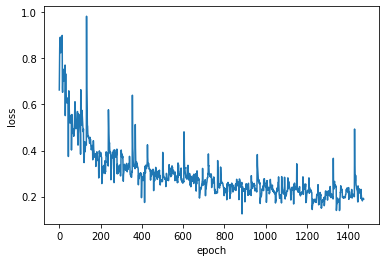

In [30]:
import numpy as np
import matplotlib.pyplot as plt
    
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("loss")
  
# function to show the plot
plt.show()

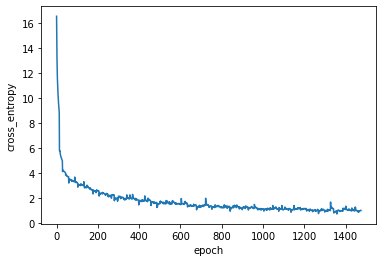

In [31]:
plt.plot(cross_entropy_list)
plt.xlabel("epoch")
plt.ylabel("cross_entropy")
  
# function to show the plot
plt.show()

In [23]:
'''
trainer = gluon.Trainer(
    net.collect_params(), 'sgd',
    {'learning_rate': 0.001, 'wd': 0.0005, 'momentum': 0.9})
for epoch in range(0, 5):
    ce_metric.reset()
    smoothl1_metric.reset()
    tic = time.time()
    btic = time.time()
    #net.hybridize(static_alloc=True, static_shape=True)
    for i, batch in enumerate(train_data):
        batch_size = batch[0].shape[0]
        data = gluon.utils.split_and_load(batch[0], ctx_list=ctx, batch_axis=0)
        cls_targets = gluon.utils.split_and_load(batch[1], ctx_list=ctx, batch_axis=0)
        box_targets = gluon.utils.split_and_load(batch[2], ctx_list=ctx, batch_axis=0)
        with autograd.record():
            cls_preds = []
            box_preds = []
            for x in data:
                cls_pred, box_pred, _ = net(x)
                cls_preds.append(cls_pred)
                box_preds.append(box_pred)
            sum_loss, cls_loss, box_loss = mbox_loss(
                cls_preds, box_preds, cls_targets, box_targets)
            autograd.backward(sum_loss)
        # since we have already normalized the loss, we don't want to normalize
        # by batch-size anymore
        trainer.step(1)
        ce_metric.update(0, [l * batch_size for l in cls_loss])
        smoothl1_metric.update(0, [l * batch_size for l in box_loss])
        name1, loss1 = ce_metric.get()
        name2, loss2 = smoothl1_metric.get()
        if i % 20 == 0:
            print('[Epoch {}][Batch {}], Speed: {:.3f} samples/sec, {}={:.3f}, {}={:.3f}'.format(
                epoch, i, batch_size/(time.time()-btic), name1, loss1, name2, loss2))
        btic = time.time()
'''

"\ntrainer = gluon.Trainer(\n    net.collect_params(), 'sgd',\n    {'learning_rate': 0.001, 'wd': 0.0005, 'momentum': 0.9})\nfor epoch in range(0, 5):\n    ce_metric.reset()\n    smoothl1_metric.reset()\n    tic = time.time()\n    btic = time.time()\n    #net.hybridize(static_alloc=True, static_shape=True)\n    for i, batch in enumerate(train_data):\n        batch_size = batch[0].shape[0]\n        data = gluon.utils.split_and_load(batch[0], ctx_list=ctx, batch_axis=0)\n        cls_targets = gluon.utils.split_and_load(batch[1], ctx_list=ctx, batch_axis=0)\n        box_targets = gluon.utils.split_and_load(batch[2], ctx_list=ctx, batch_axis=0)\n        with autograd.record():\n            cls_preds = []\n            box_preds = []\n            for x in data:\n                cls_pred, box_pred, _ = net(x)\n                cls_preds.append(cls_pred)\n                box_preds.append(box_pred)\n            sum_loss, cls_loss, box_loss = mbox_loss(\n                cls_preds, box_preds, cls_

In [25]:

#from gluoncv.utils import metrics
#map_eval = metrics.voc_detection.VOCMApMetric(class_names=classes)
#map_eval.update()

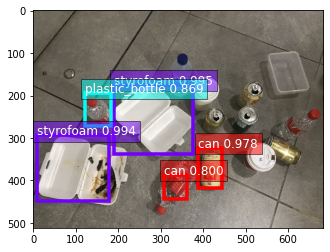

In [36]:
#test_url = 'http://www.paulnoll.com/Oregon/Chinese/food-chestnuts.jpg'
#download(test_url, 'bottle_test37.jpg')
net = gcv.model_zoo.get_model('ssd_512_mobilenet1.0_custom', classes=classes, pretrained_base=False)
#net.load_parameters('ssd_512_mobilenet1.0_bottlemetal.params')
net.load_parameters('/content/drive/MyDrive/ssd_512_mobilenet_01.params')
x, image = gcv.data.transforms.presets.ssd.load_test('/content/a26.jpeg', 512)
cid, score, bbox = net(x)
ax = viz.plot_bbox(image, bbox[0], score[0], cid[0], class_names=classes)
plt.savefig("a26_prediction.png")
plt.show()

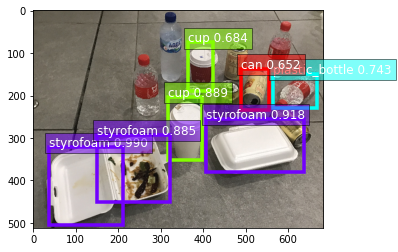

In [37]:
x, image = gcv.data.transforms.presets.ssd.load_test('/content/drive/MyDrive/test_image/a22.jpeg', 512)
cid, score, bbox = net(x)
ax = viz.plot_bbox(image, bbox[0], score[0], cid[0], class_names=classes)
plt.savefig("a22_prediction.png")
plt.show()

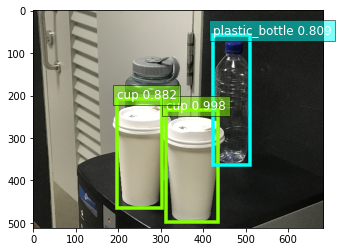

In [39]:
x, image = gcv.data.transforms.presets.ssd.load_test('/content/drive/MyDrive/test_image/a18.jpg', 512)
cid, score, bbox = net(x)
ax = viz.plot_bbox(image, bbox[0], score[0], cid[0], class_names=classes)
plt.savefig("a18_prediction.png")
plt.show()

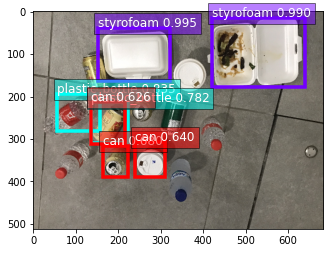

In [40]:
x, image = gcv.data.transforms.presets.ssd.load_test('/content/drive/MyDrive/test_image/a23.jpeg', 512)
cid, score, bbox = net(x)
ax = viz.plot_bbox(image, bbox[0], score[0], cid[0], class_names=classes)
plt.savefig("a23_prediction.png")
plt.show()